**Install pycaret into environment**

In [ ]:
!pip install uv
!uv pip install pycaret[full] --system

Streaming output truncated to the last 5000 lines.
deprecation ------------------------------ 11.18 kB/11.18 kB
retrying   ------------------------------ 11.60 kB/11.60 kB
percy      ------------------------------ 12.00 kB/12.00 kB
flask-wtf  ------------------------------ 12.72 kB/12.72 kB
graphql-relay ------------------------------ 16.94 kB/16.94 kB
ansi2html  ------------------------------ 17.61 kB/17.61 kB
adagio     ------------------------------ 19.07 kB/19.07 kB
jmespath   ------------------------------ 20.26 kB/20.26 kB
kmodes     ------------------------------ 20.41 kB/20.41 kB
aniso8601  ------------------------------ 31.57 kB/52.75 kB
litestar   ------------------------------ 439.37 kB/538.37 kB
jedi       ------------------------------ 409.41 kB/1.57 MB
faker      ------------------------------ 638.98 kB/1.83 MB
tsdownsample ------------------------------ 1.33 MB/2.08 MB
pmdarima   ------------------------------ 1.38 MB/2.12 MB
moto       ------------------------------ 739

**Mount google drive and copy kaggle.json to machine**

In [ ]:
from google.colab import drive
drive.mount('mount')

Mounted at mount


In [ ]:
!cp mount/MyDrive/kaggle.json .
!ls

kaggle.json  mount  sample_data


**Acquire the network connections dataset from kaggle and extract zip**

I am using this dataset uploaded 6 years ago on kaggle:

https://www.kaggle.com/datasets/anushonkar/network-anamoly-detection

In [ ]:
!KAGGLE_CONFIG_DIR=$(pwd) kaggle datasets download anushonkar/network-anamoly-detection
!unzip network-anamoly-detection.zip

Dataset URL: https://www.kaggle.com/datasets/anushonkar/network-anamoly-detection
License(s): unknown
 69% 2.00M/2.88M [00:01<00:00, 1.80MB/s]
100% 2.88M/2.88M [00:01<00:00, 2.11MB/s]
Archive:  network-anamoly-detection.zip
  inflating: Network Anamoly Detection.docx  
  inflating: Test.txt                
  inflating: Train.txt               


**Load the csv into a pandas dataframe**

In [ ]:
import pandas as pd
data = pd.read_csv('Train.txt', names = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate", "rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate", "dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])

data['attack'].loc[data['attack'] != 'normal'] = 'attack'
data['attack'] = data['attack'].apply(lambda x: 1 if x == 'attack' else 0)

data.drop(['land', 'urgent', 'numfailedlogins', 'numoutboundcmds'], axis=1, inplace=True)

data.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,tcp,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,tcp,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21


**Import pycaret and setup an anomaly experiment**

In [ ]:
from pycaret.anomaly import AnomalyExperiment
exp = AnomalyExperiment()
data_without_attack_col = data.drop('attack', axis=1)
exp.setup(data_without_attack_col, session_id = 1337, use_gpu=True)

,Description,Value
0,Session id,1337
1,Original data shape,"(125973, 38)"
2,Transformed data shape,"(125973, 119)"
3,Numeric features,35
4,Categorical features,3
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


<Axes: >

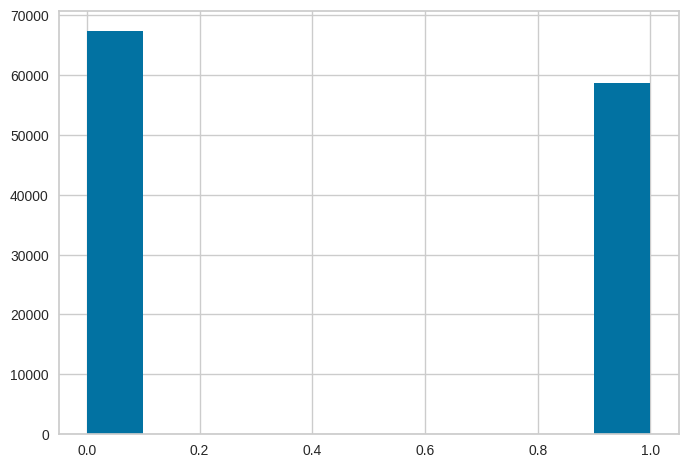

In [ ]:
data['attack'].hist()

**Train models**

In [ ]:
iforest = exp.create_model('iforest', fraction=0.45)
iforest

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.45,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=1337, verbose=0)

**Evaluate Model**

In [ ]:
exp.evaluate_model(iforest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Predict on test data using Model**

In [ ]:
iforest_results = exp.assign_model(iforest)
iforest_results

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,Anomaly,Anomaly_Score
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,-0.020890
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,1,0.067867
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,0,-0.010739
3,0,tcp,http,SF,232,8153,0,0,1,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,0,-0.018159
4,0,tcp,http,SF,199,420,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,-0.037977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20,0,-0.006735
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21,1,0.019117
125970,0,tcp,smtp,SF,2231,384,0,0,1,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18,0,-0.006879
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20,0,-0.005305


In [ ]:
from sklearn.metrics import classification_report

test_df = pd.DataFrame()
test_df['actual'] = data['attack']
test_df['pred'] = iforest_results['Anomaly']

print(classification_report(test_df['actual'], test_df['pred']))

              precision    recall  f1-score   support

           0       0.62      0.63      0.62     67343
           1       0.56      0.55      0.55     58630

    accuracy                           0.59    125973
   macro avg       0.59      0.59      0.59    125973
weighted avg       0.59      0.59      0.59    125973



In [ ]:
predictions = exp.predict_model(iforest, data=data_without_attack_col)
predictions.head(10)

,duration,protocoltype_tcp,protocoltype_udp,protocoltype_icmp,service_ftp_data,service_other,service_private,service_http,service_remote_job,service_name,...,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,Anomaly,Anomaly_Score
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20.0,0,-0.020890
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15.0,1,0.067867
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19.0,0,-0.010739
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21.0,0,-0.018159
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.0,0,-0.037977
5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21.0,1,0.030745
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21.0,0,-0.020557
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,21.0,0,-0.018381
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,21.0,0,-0.017871
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,21.0,0,-0.020320


**Save the model to disk**

In [ ]:
# save pipeline
exp.save_model(iforest, 'iforest_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['duration', 'srcbytes', 'dstbytes',
                                              'wrongfragment', 'hot', 'loggedin',
                                              'numcompromised', 'rootshell',
                                              'suattempted', 'numroot',
                                              'numfilecreations', 'numshells',
                                              'numaccessfiles', 'ishostlogin',
                                              'isguestlogin', 'count',
                                              'srvcount', 'serrorrate',
                                              'srvserrorrate', 'rerrorrate'...
                 ('onehot_encoding',
                  TransformerWrapper(include=['protocoltype', 'service', 'flag'],
                                     transformer=OneHotEncoder(cols=['protocoltype',
                        

**Further tune the model**

In [ ]:
knn = exp.create_model('knn', fraction=0.45)
knn

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KNN(algorithm='auto', contamination=0.45, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
knn_results = exp.assign_model(knn)
knn_results

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,Anomaly,Anomaly_Score
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,1,34.132373
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,6.418816
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,0,3.000000
3,0,tcp,http,SF,232,8153,0,0,1,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,1,41.870016
4,0,tcp,http,SF,199,420,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,1,15.297088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20,0,1.000100
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21,0,3.000000
125970,0,tcp,smtp,SF,2231,384,0,0,1,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18,1,66.438274
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20,0,1.732080


In [ ]:
from sklearn.metrics import classification_report

test_df = pd.DataFrame()
test_df['actual'] = data['attack']
test_df['pred'] = knn_results['Anomaly']

print(classification_report(test_df['actual'], test_df['pred']))

              precision    recall  f1-score   support

           0       0.20      0.20      0.20     67343
           1       0.05      0.05      0.05     58630

    accuracy                           0.13    125973
   macro avg       0.13      0.13      0.13    125973
weighted avg       0.13      0.13      0.13    125973



In [ ]:
cluster = exp.create_model('cluster', fraction=0.45)
cluster

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

CBLOFForceToDouble(alpha=0.9, beta=5, check_estimator=False,
          clustering_estimator=None, contamination=0.45, n_clusters=8,
          n_jobs=None, random_state=1337, use_weights=False)

In [ ]:
cluster_results = exp.assign_model(cluster)
cluster_results

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,Anomaly,Anomaly_Score
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,0,10128.361769
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,0,10458.312529
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,1,10597.660311
3,0,tcp,http,SF,232,8153,0,0,1,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,1,11172.466125
4,0,tcp,http,SF,199,420,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,0,10293.533028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20,1,10598.046253
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21,0,10456.696746
125970,0,tcp,smtp,SF,2231,384,0,0,1,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18,0,8355.778809
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20,1,10597.921849


In [ ]:
from sklearn.metrics import classification_report

test_df = pd.DataFrame()
test_df['actual'] = data['attack']
test_df['pred'] = cluster_results['Anomaly']

print(classification_report(test_df['actual'], test_df['pred']))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     67343
           1       0.79      0.76      0.78     58630

    accuracy                           0.80    125973
   macro avg       0.80      0.79      0.80    125973
weighted avg       0.80      0.80      0.80    125973

